# 결정 트리 예제

In [0]:
from sklearn.datasets import load_iris
X = iris.data[:,:2]
y = iris.target

In [27]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 3)
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# 그래프 그리기

In [3]:
!pip install graphviz

In [0]:
from sklearn.tree import export_graphviz
import graphviz
export_graphviz(clf, out_file = "./iris.dot",feature_names = iris.feature_names[:2],class_names = iris.target_names,filled = True)

In [0]:
with open("./iris.dot") as f:
  dot_graph = str(open("./iris.dot","rb").read(),"utf8")

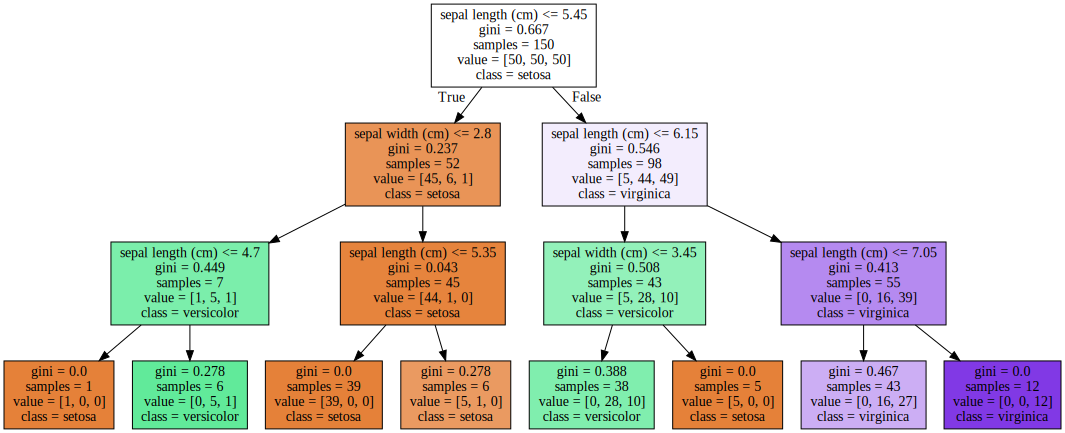

In [30]:
graphviz.Source(dot_graph)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

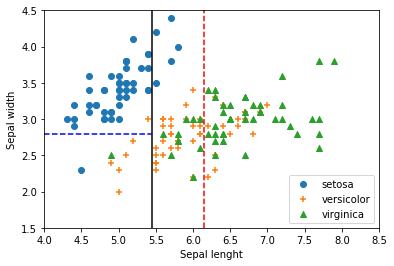

In [20]:
plt.xlim(4, 8.5)
plt.ylim(1.5, 4.5)

markers = ['o','+','^']
for i in range(3):
  xs = X[:,0][y == i]
  ys = X[:,1][y == i]
  plt.scatter(xs,ys,marker = markers[i])

plt.legend(iris.target_names)
plt.xlabel("Sepal lenght")
plt.ylabel("Sepal width")

xx = np.linspace(5.45, 5.45, 20)
yy = np.linspace(1.5,4.5,20)
plt.plot(xx,yy,'-k') # 검정색 실선

xx = np.linspace(4,5.45,20)
yy = np.linspace(2.8,2.8,20)
plt.plot(xx,yy,'--b') # 파란선

xx = np.linspace(6.15,6.15,20)
yy = np.linspace(1.5,4.5,20)


# 클래스 확률

In [21]:
print(clf.predict([[5.5,4]]))

[1]


In [22]:
print(clf.predict_proba([[5.5,4]]))

[[0.11627907 0.65116279 0.23255814]]


# 판별 기준

* 엔트로피
* 지니계수

# 유방암 분류

In [0]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

In [36]:
cancer = load_breast_cancer()
np.random.seed(9)
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print(clf.score(X_test,y_test))

0.916083916083916
